In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.stats as stats

In [64]:
df = pd.read_csv("data/loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
maleAndYes = len(df[(df["Gender"]=="Male") & 
             (df["Loan_Status"]=="Y")])
male = len(df[(df["Gender"]=="Male")])
print(maleAndYes/male)
femaleAndYes = len(df[(df["Gender"]=="Female") & 
             (df["Loan_Status"]=="Y")])
female = len(df[(df["Gender"]=="Female")])
print(femaleAndYes/female)

0.6932515337423313
0.6696428571428571


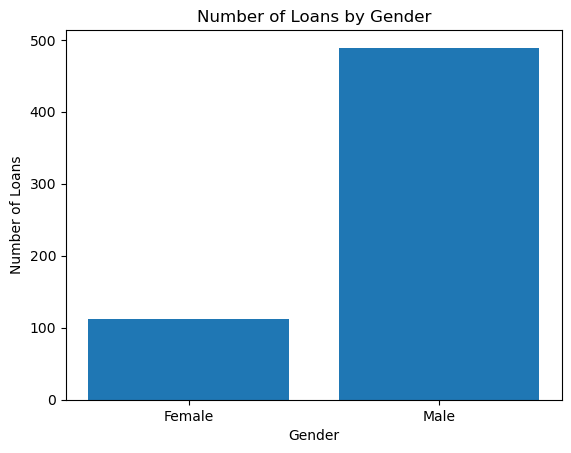

In [20]:
gender_counts = df.groupby('Gender')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Loans")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

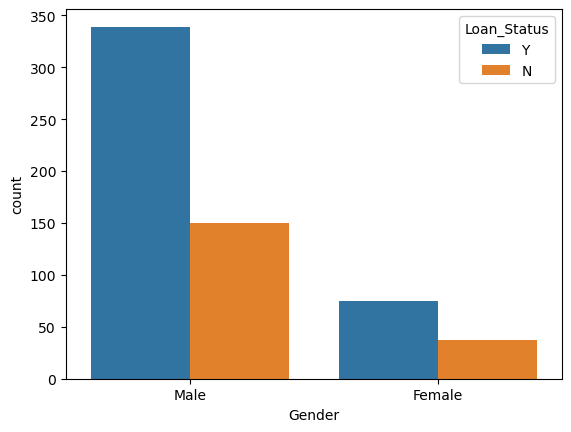

In [22]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)


In [16]:
dependentsBigYes = len(df[(df['Dependents'] != "0") & 
             (df["Loan_Status"]=="Y")])
dependentsBig = len(df[(df['Dependents'] != "0")])
print(dependentsBigYes/dependentsBig)
dependentsSmallYes = len(df[(df['Dependents'] == "0") & 
             (df["Loan_Status"]=="Y")])
dependentsSmall = len(df[(df['Dependents'] == "0")])
print(dependentsSmallYes/dependentsSmall)

0.6840148698884758
0.6898550724637681


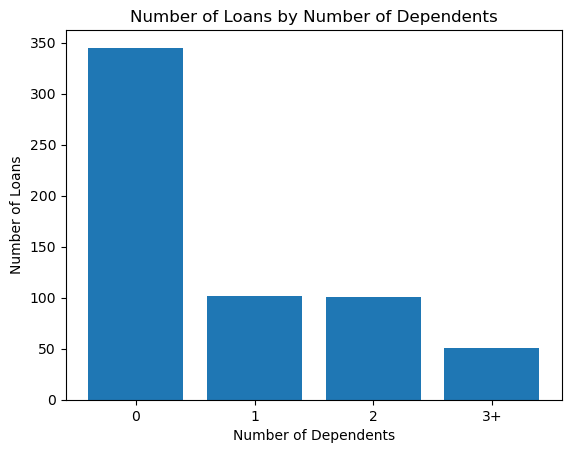

In [24]:
gender_counts = df.groupby('Dependents')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Number of Loans")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

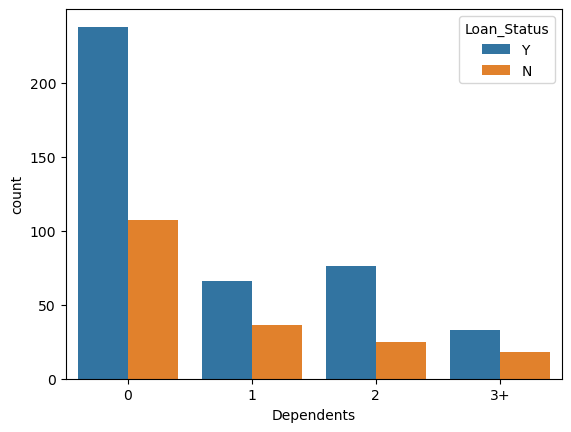

In [23]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

In [56]:
df["ApplicantIncome"].mean()

5403.459283387622

In [65]:
df["APZScores"] = stats.zscore(df["ApplicantIncome"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [66]:
yes = df[(df["APZScores"]<=0.01)& 
             (df["APZScores"]>=-0.01)]
yes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.002218
141,LP001498,Male,No,0,Graduate,No,5417,0.0,168.0,360.0,1.0,Urban,Y,0.002218
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N,0.002218
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y,-0.002041


In [67]:
def bin(t):
  """return 'High' if the temperature is above the threshold, 'Low' otherwise"""
  if t < -1.5:
    return "Very Low"
  if t < -0.5:
    return "Low"
  if t < .5:
    return "Middle"
  if t < 1.5:
    return "High"
  else:
    return "Very High"

In [68]:
# no code needs to be changed in this block
df['ApplicantIncome'] = df.apply(lambda row : bin(row['APZScores']), axis = 1)
df 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,Middle,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,Middle,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,Middle,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,Middle,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,Middle,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Middle,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,Middle,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,Middle,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,Middle,0.0,187.0,360.0,1.0,Urban,Y,0.357064


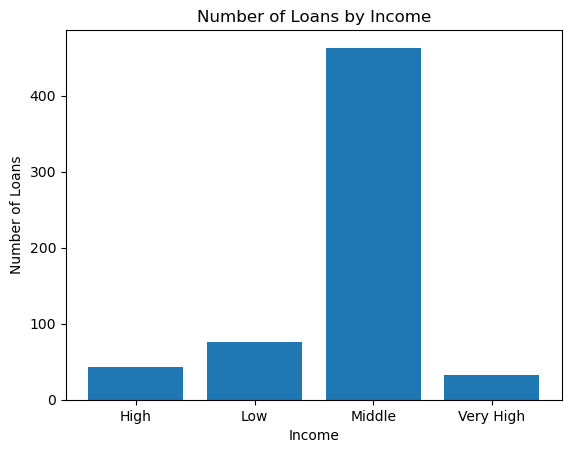

In [69]:
gender_counts = df.groupby('ApplicantIncome')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Income")
plt.xlabel("Income")
plt.ylabel("Number of Loans")
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

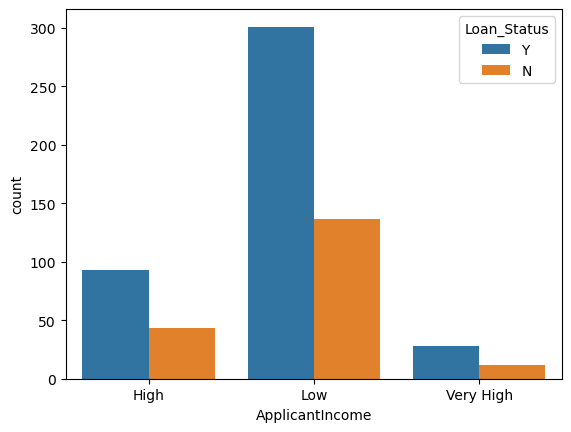

In [49]:
sns.countplot(x='ApplicantIncome', hue='Loan_Status', data=df)

In [50]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,High,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,Low,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,Low,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,Low,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,High,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Low,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,Low,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,High,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,High,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [75]:
# yes = len(df[(df["ApplicantIncome"]=="Very Low") & 
#              (df["Loan_Status"]=="Y")])
# total = len(df[(df["ApplicantIncome"]=="Very Low")])
# print(yes/total)
yes = len(df[(df["ApplicantIncome"]=="Low") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="Low")])
print("Low: " + str(yes/total))
yes = len(df[(df["ApplicantIncome"]=="Middle") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="Middle")])
print("Middle: " + str(yes/total))
yes = len(df[(df["ApplicantIncome"]=="High") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="High")])
print("High: " + str(yes/total))
yes = len(df[(df["ApplicantIncome"]=="Very High") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="Very High")])
print("Very High: " + str(yes/total))

Low: 0.6578947368421053
Middle: 0.693304535637149
High: 0.6511627906976745
Very High: 0.71875


In [77]:
yes = len(df[df["Loan_Status"]=="Y"])
total = len(df)
print("Average Likelihood of Getting a Loan: " + str(yes/total))

Average Likelihood of Getting a Loan: 0.6872964169381107


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

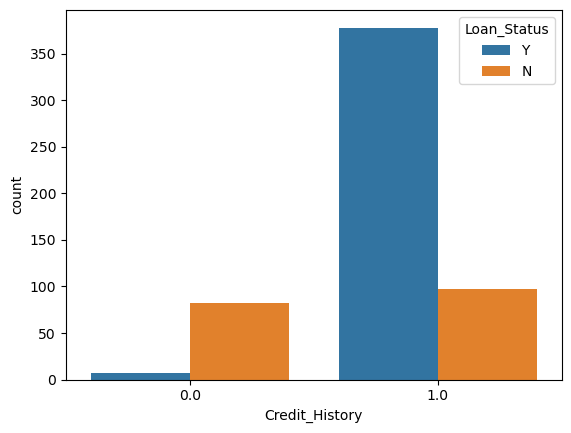

In [78]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

In [79]:
yes = len(df[(df["Credit_History"]==1) & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Credit_History"]==1)])
print("CH=1: " + str(yes/total))
yes = len(df[(df["Credit_History"]==0) & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Credit_History"]==0)])
print("CH=0: " + str(yes/total))

CH=1: 0.7957894736842105
CH=0: 0.07865168539325842


In [81]:
yes = len(df[(df["Self_Employed"]=="Yes") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Self_Employed"]=="Yes")])
print("Self Employed: " + str(yes/total))
yes = len(df[(df["Self_Employed"]=="No") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Self_Employed"]=="No")])
print("Employed: " + str(yes/total))

Self Employed: 0.6829268292682927
Employed: 0.686


In [82]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,Middle,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,Middle,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,Middle,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,Middle,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,Middle,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Middle,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,Middle,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,Middle,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,Middle,0.0,187.0,360.0,1.0,Urban,Y,0.357064


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

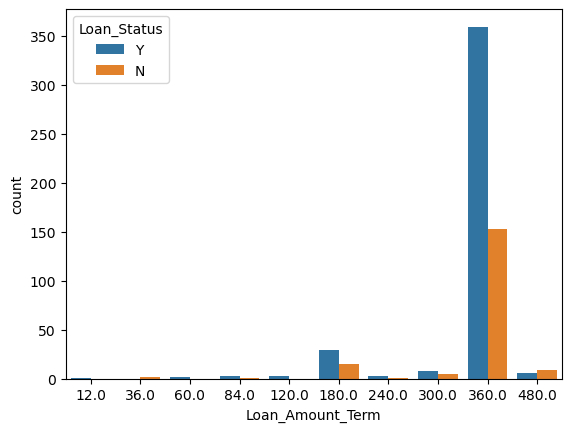

In [83]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)